In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


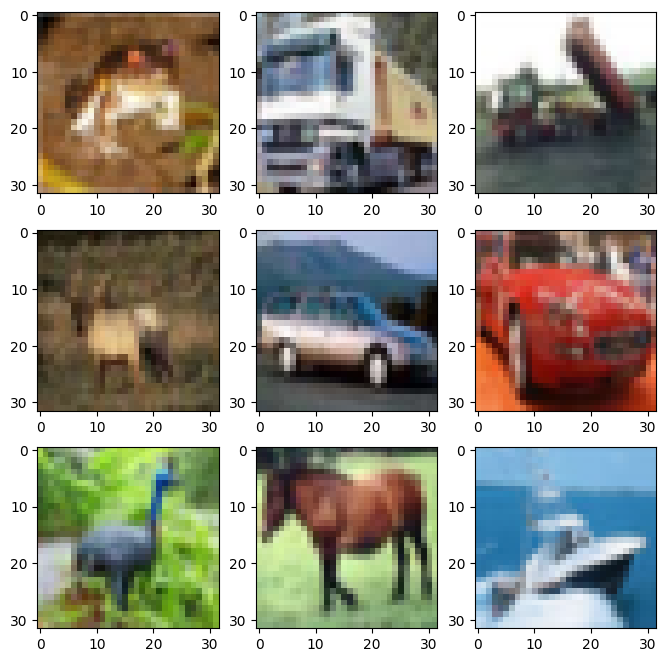

In [ ]:
columns = 3
rows = 3

f, axs = plt.subplots(rows, columns, figsize=(8, 8))

for r in range(0, rows):
    for c in range(0, columns):
        axs[r, c].imshow(x_train[(columns * r) + c])

plt.show()

In [ ]:
num_classes = 10

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 32*32*3))
x_test = x_test.reshape((-1, 32*32*3))

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
391/391 [==============================] - 27s 68ms/step - loss: 1.9472 - accuracy: 0.3080 - val_loss: 1.8441 - val_accuracy: 0.3445
Epoch 2/11
391/391 [==============================] - 28s 71ms/step - loss: 1.7829 - accuracy: 0.3736 - val_loss: 1.7650 - val_accuracy: 0.3835
Epoch 3/11
391/391 [==============================] - 25s 63ms/step - loss: 1.7138 - accuracy: 0.4007 - val_loss: 1.6923 - val_accuracy: 0.4162
Epoch 4/11
391/391 [==============================] - 25s 63ms/step - loss: 1.6638 - accuracy: 0.4184 - val_loss: 1.6522 - val_accuracy: 0.4188
Epoch 5/11
391/391 [==============================] - 26s 67ms/step - loss: 1.6222 - accuracy: 0.4335 - val_loss: 1.6283 - val_accuracy: 0.4243
Epoch 6/11
391/391 [==============================] - 25s 65ms/step - loss: 1.5888 - accuracy: 0.4470 - val_loss: 1.6084 - val_accuracy: 0.4316
Epoch 7/11
391/391 [==============================] - 24s 60ms/step - loss: 1.5625 - accuracy: 0.4538 - val_loss: 1.5854 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.529106855392456
Test accuracy: 0.4487999975681305


In [ ]:
from sklearn.metrics import classification_report
labelNames = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

predictions = model.predict(x_test, batch_size=32)
report = classification_report(
    y_test.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=labelNames,
)
print(report)


313/313 [==============================] - 6s 20ms/step
              precision    recall  f1-score   support

    airplane       0.53      0.45      0.49      1000
  automobile       0.52      0.61      0.56      1000
        bird       0.38      0.28      0.32      1000
         cat       0.40      0.18      0.25      1000
        deer       0.35      0.49      0.41      1000
         dog       0.33      0.44      0.38      1000
        frog       0.55      0.45      0.49      1000
       horse       0.55      0.53      0.54      1000
        ship       0.42      0.77      0.54      1000
       truck       0.66      0.29      0.40      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000



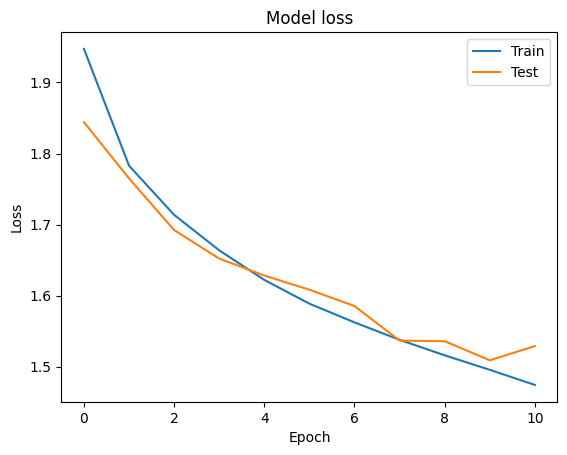

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

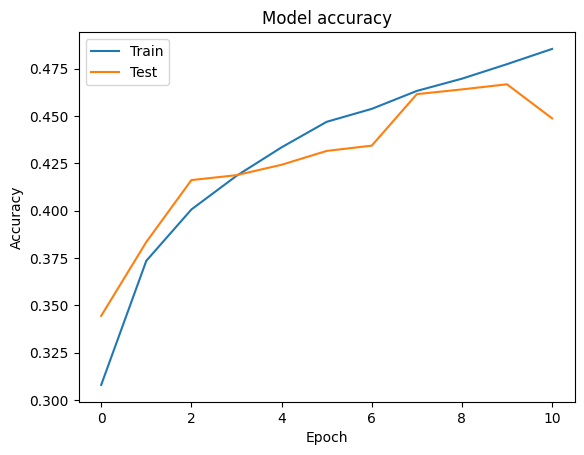

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()